## Import relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# Train Data

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Wrangling

In [6]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [7]:
data["Cabin"] = data["Cabin"].fillna(method = "ffill")

In [8]:
data["Embarked"] = data["Embarked"].fillna(method = "ffill")

In [9]:
data = data.dropna()

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,C123,Q


In [11]:
data["Name"] = label.fit_transform(data["Name"])

data["Sex"] = label.fit_transform(data["Sex"])

data["Ticket"] = label.fit_transform(data["Ticket"])

data["Cabin"] = label.fit_transform(data["Cabin"])

data["Embarked"] = label.fit_transform(data["Embarked"])

## Exploration

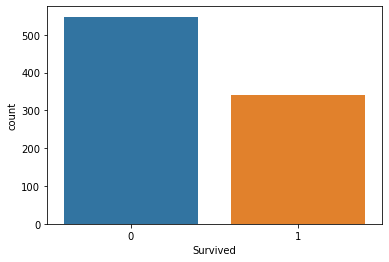

In [12]:
sns.countplot(x="Survived", data=data)

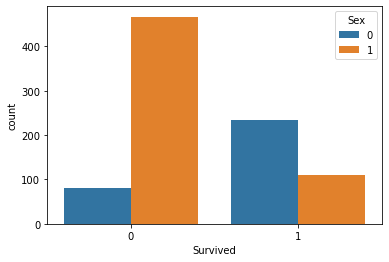

In [13]:
sns.countplot(x="Survived", hue="Sex", data=data)

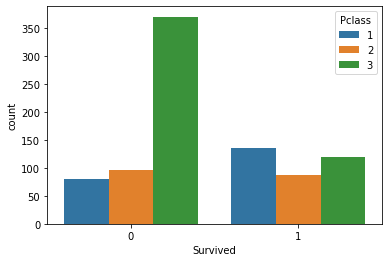

In [14]:
sns.countplot(x="Survived", hue="Pclass", data=data)

In [15]:
data["age_category"]= pd.cut(data["Age"], bins = [0,5,12,18,35,60,100], labels = ["Infant","Child","Teenager","Young Adult","Adult","Senior"])

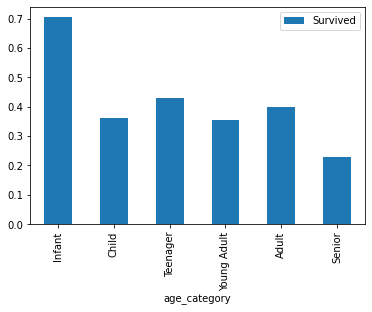

In [16]:
pivot = data.pivot_table(index="age_category",values='Survived')
pivot.plot.bar()
plt.show()

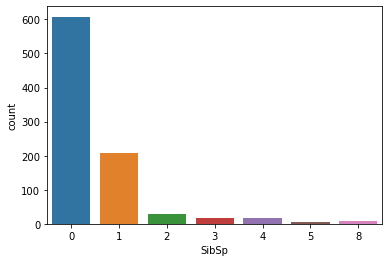

In [17]:
sns.countplot("SibSp", data=data)

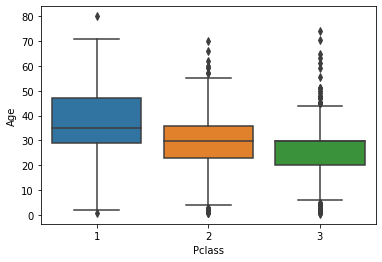

In [18]:
sns.boxplot(x="Pclass", y="Age", data=data)

In [19]:
data.drop("age_category",axis = 1, inplace = True)

## Test_data

In [20]:
Test_data = pd.read_csv("test.csv")

In [21]:
Test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
data.shape

(890, 12)

In [23]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [24]:
Test_data["Age"] = Test_data["Age"].fillna(Test_data["Age"].mean())

In [25]:
Test_data["Cabin"] = Test_data["Cabin"].fillna(method = "bfill")
Test_data["Cabin"] = Test_data["Cabin"].fillna(method = "ffill")

In [26]:
Test_data["Fare"] = Test_data["Fare"].fillna(method = "bfill")

In [27]:
Test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [28]:
Test_data["Name"] = label.fit_transform(Test_data["Name"])

Test_data["Sex"] = label.fit_transform(Test_data["Sex"])

Test_data["Ticket"] = label.fit_transform(Test_data["Ticket"])

Test_data["Cabin"] = label.fit_transform(Test_data["Cabin"])

Test_data["Embarked"] = label.fit_transform(Test_data["Embarked"])

In [29]:
x_test = Test_data

## Modeling

In [30]:
y_train = data.iloc[:,1:2]
x_train = data.drop("Survived", axis = 1)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [32]:
y_train.shape

(890, 1)

In [33]:
x_train.shape

(890, 11)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000, penalty = "l2")
model.fit(x_train,y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=1000)

In [35]:
prediction = model.predict(x_train)

In [38]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_train, prediction) 
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[476  72]
 [ 95 247]]


In [39]:
from sklearn import datasets, linear_model, metrics 
print("Logistic Regression model accuracy(in %):",
metrics.accuracy_score(y_train, prediction)*100)

Logistic Regression model accuracy(in %): 81.23595505617978


In [40]:
pred = model.predict(x_test)

In [41]:
data = pd.read_csv("test.csv")

In [42]:
prediction = pd.DataFrame({"Passenger_Name":data["Name"],"Gender":data["Sex"], "Survived":pred})

In [43]:
prediction

,Passenger_Name,Gender,Survived
0,"Kelly, Mr. James",male,0
1,"Wilkes, Mrs. James (Ellen Needs)",female,0
2,"Myles, Mr. Thomas Francis",male,0
3,"Wirz, Mr. Albert",male,0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,0
...,...,...,...
413,"Spector, Mr. Woolf",male,0
414,"Oliva y Ocana, Dona. Fermina",female,0
415,"Saether, Mr. Simon Sivertsen",male,0
416,"Ware, Mr. Frederick",male,0


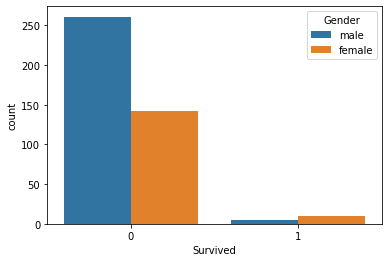

In [44]:
sns.countplot(x = "Survived", hue = "Gender", data = prediction)

In [45]:
pd.DataFrame(prediction['Survived'].value_counts(sort = True))

,Survived
0,403
1,15


In [46]:
prediction.groupby(["Survived","Gender"]).count()

Passenger_Name
Survived Gender                
0        female             142
         male               261
1        female              10
         male                 5